# Summer of ML | 2021

A 3-week series of workshops and a hackathon covering different topics in the fundamentals of ML.

---

# Workshop 1: Linear Algebra & Probability-Statistics

### Instructor: [Pramit Das](https://www.linkedin.com/in/pramit-das-b1747054/)

In this workshop, we will be covering basic concepts related to the mathematics involved in Machine Learning. 

In the first part, we plan to learn the fundamental uses of Eigen values, matrix factorization and how we use those notions in ML. 
In the second part, we intend to go over some basic statistical distributions and a very simple yet useful technique called Naive Bayes Classification.


## Part 1: Linear Algebra

### **Singular Value Decomposition (SVD)**

In order to extract information from a given matrix, we can use the SVD to obtain 3 arrays which can be multiplied to obtain the original matrix A. From the theory of linear algebra, given a matrix 
, the following product can be computed:

<div align="center">
 $ U\Sigma V^T  = A$
</div>

where U and V are orthogonal and $ \Sigma $ is the same size as A. $ \Sigma $ is a diagonal matrix and contains the [singular values](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/eigs.pdf) of A, organized from largest to smallest. These values are always non-negative and can be used as an indicator of the “importance” of some features represented by the matrix  $ A $ .

The problem of finding matrices U, V and $ \Sigma $ given any matrix A is known as **Singular Value Decomposition**.

---

Numpy provides an easy and effecient function to directly get the singular decomposition of any matrix

In [ ]:
import numpy as np

A = np.asarray([[1, 0, 0], [0, 1, 0]])

U, s, Vt = np.linalg.svd(A)

# s is a space efficient representation of the diagonal matrix
# the next 3 lines convert s to the actual matrix Sigma
Sigma = np.zeros((A.shape))
for i in range(s.shape[0]):
    Sigma[i, i] = s[i]


# Ignore -- only to make output 
print("The original matrix is: \n", A)
print("\nThe SVD is: \n", U, "\n * \n", Sigma, "\n * \n", Vt)

The original matrix is: 
 [[1 0 0]
 [0 1 0]]

The SVD is: 
 [[1. 0.]
 [0. 1.]] 
 * 
 [[1. 0. 0.]
 [0. 1. 0.]] 
 * 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
print("U*Sigma*Vt is: \n", np.matmul(np.matmul(U, Sigma), Vt))

U*Sigma*Vt is: 
 [[1. 0. 0.]
 [0. 1. 0.]]


Note that this is equal to the original matrix A.


### **QR Decomposition**

Any real square matrix A may be decomposed as
$ A=QR$
where Q is an orthogonal matrix meaning $ Q^T = Q^{−1} $ and $ R$ is an upper triangular matrix. 

This is called QR decomposition.

---
Again, getting the QR decomposition is made much simpler by numpy.

In [ ]:
import numpy as np

A = np.asarray([[1, 2, 3], [0, 4, 5], [0, 0, 6]])
Q, R = np.linalg.qr(A)


print(Q)
print(R)

# Lets check whether the decomposition matrices are actually correct
print(np.matmul(Q, R))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]
[[1. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]


Note that Q is orthogonal, R is upper triangular, and Q*R = A

### **Principal Component Analysis (PCA)**

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

The principal components are the directions where the data has the most variation. So the projections of the data upon a subset of these principle components can be a good representation for the entire data. 

PCA is very popular as a dimensionality reduction technique

#### **Basic Approach**

For any general $m*n $ matrix  $A$ (can be interpreted as having *m* rows of *n* dimensional vectors), PCA can be done as follows:

1. Shift the values by their mean, let this be matrix $C$ (thus, the mean of each vector of $C$ is 0)
2. Calculate the Covariance Matrix of $C$
3. Get the Eigen vectors of the Covariance Matrix
4. Get projections of the original data along these eigen vectors

The eigen vectors obtained in step 3 are the principal components. 

In [ ]:
import numpy as np

# define a matrix
A = np.asarray([[1, 2], [3, 4], [5, 6]])
print(A)


[[1 2]
 [3 4]
 [5 6]]


1. Shift the values by their mean

In [ ]:
Mean = np.mean(A.T, axis=1)
C = A - Mean
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


2. Calculate covariance matrix of mean-shifted matrix

In [ ]:
Cov = np.cov(C.T)
print(Cov)

[[4. 4.]
 [4. 4.]]


3. Eigen-decomposition of covariance matrix

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(V)
print(eigen_vectors)
print(eigen_values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


4. Projection of data into the principle components

In [ ]:
P = eigen_vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


#### **Using SKLearn**

In [ ]:
from sklearn.decomposition import PCA

# Using the same array as before for comparisions
A = np.asarray([[1, 2], [3, 4], [5, 6]])

pca = PCA(n_components=2)
pca.fit(A)

B = pca.transform(A)
print(B)

[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


Note that the final projections are the same as we obtained manually

The library also allows you to separately get the principal components 

In [ ]:
component_directions = pca.components_
component_values = pca.explained_variance_

print(component_directions)
print(component_values)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]


#### **Visualisation**

Lets try to visualise the principle components of some data.

First, we will get data for visualisation. Using sklearn, we can get data of types we want

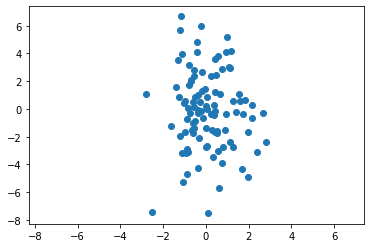

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

center = (0, 0)

A, _ = make_blobs(n_samples=100, centers = [center])
# making variations in y-axis larger so that differences in the components can be prominent
A[:, 1] = 3 * A[:, 1]


# Plotting stuff that is not important to know for this workshop
plt.scatter(A[:, 0], A[:, 1])
y_axes_boundaries = (1.1*np.min(A[:, 1]), 1.1*np.max(A[:, 1]))
plt.ylim(y_axes_boundaries)
plt.xlim(y_axes_boundaries)
plt.show()

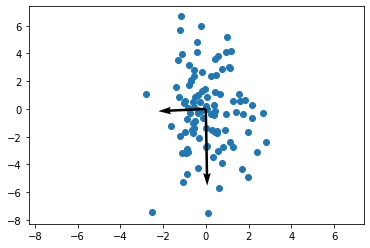

In [ ]:
pca = PCA(n_components=2)
pca.fit(A)

# getting the principal components
component_vectors = pca.components_
component_values = np.sqrt(pca.explained_variance_)
components = component_vectors / (np.sqrt(component_values))

# scaling the components jus for clearer visualisation
components = 5*components

center = (0, 0)
centers = [center for i in range(0, components.shape[0])]

# Plotting stuff that is not important to know for this workshop
plt.scatter(A[:, 0], A[:, 1])
plt.quiver(*centers, components[:,0], components[:,1], scale=21)
plt.ylim(y_axes_boundaries)
plt.xlim(y_axes_boundaries)
plt.show()

Note that these are the same as the eigen values and vectors we obtained using the basic method

## Part 2: Probability and Statistics

### Gaussian (Normal) Distributions

A Normal Distribution follows the probability density function: 

$ \Large f(x) = \frac{1}{\sigma \sqrt{2\pi}}  e^{-\frac{1}{2}\cdot (\frac{x-\mu}{\sigma})^2} $ 

where $ \mu$ is the mean of the distribution and $\sigma $ is the standard deviation

In [ ]:
import numpy as np

# mean and standard deviation
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 10000)

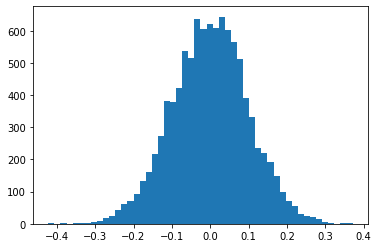

In [ ]:
import matplotlib.pyplot as plt

plt.hist(s, bins=50)
plt.show()

Gaussian distribution curve for  10  samples


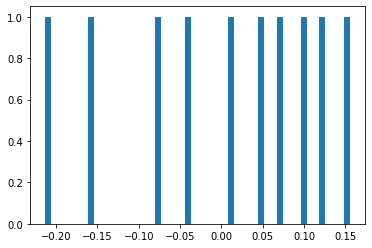

Gaussian distribution curve for  100  samples


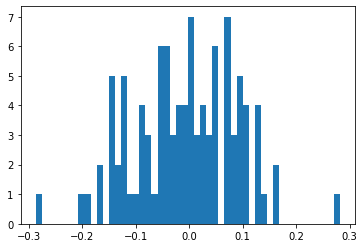

Gaussian distribution curve for  1000  samples


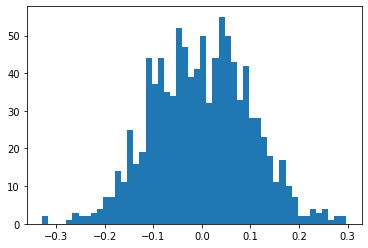

Gaussian distribution curve for  10000  samples


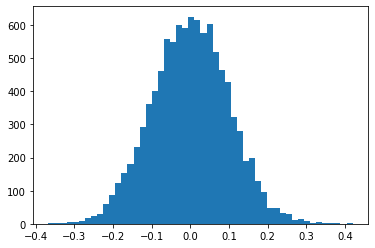

Gaussian distribution curve for  100000  samples


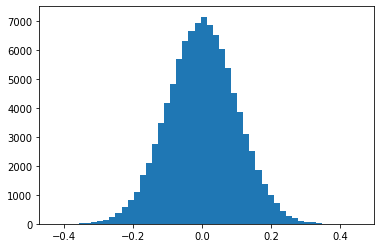

In [ ]:
for i in range(1, 6):
    mu, sigma = 0, 0.1 
    s = np.random.normal(mu, sigma, 10**i)

    print("Gaussian distribution curve for ", 10**i, " samples")

    plt.hist(s, bins=50)
    plt.show()

As can be seen above, for small number of samples, the distributions seems random, but as the number of samples increases, a bell-shaped patterns appears

### Poisson Distribution

A Poisson Distribution follows the probability density function: 

$ \Large {f(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}} $ 

where $ \lambda$ is the mean of the distribution and $k $ is the number of occurrences

In [ ]:
import numpy as np

lamda = 1000
size = 1000
poisson = np.random.poisson(lam=lamda, size=size)

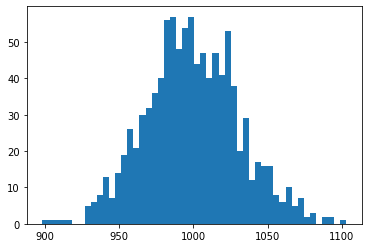

In [ ]:
import matplotlib.pyplot as plt

plt.hist(poisson, bins=50)
plt.show()


### Naive Bayes Classifier

#### **Iris Flower Species Classification**

The Data

In [3]:
!wget https://drive.google.com/uc?id=1yO9BDhqPVG9BkUN1B6gh5gxOX_0QBYN2 -O iris.csv

--2021-06-15 08:27:46--  https://drive.google.com/uc?id=1yO9BDhqPVG9BkUN1B6gh5gxOX_0QBYN2
Resolving drive.google.com (drive.google.com)... 173.194.212.102, 173.194.212.100, 173.194.212.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9gol6t28ukhigsdkc50ne22blpus00jd/1623745650000/13054947803562741199/*/1yO9BDhqPVG9BkUN1B6gh5gxOX_0QBYN2 [following]
--2021-06-15 08:27:47--  https://doc-0o-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9gol6t28ukhigsdkc50ne22blpus00jd/1623745650000/13054947803562741199/*/1yO9BDhqPVG9BkUN1B6gh5gxOX_0QBYN2
Resolving doc-0o-9c-docs.googleusercontent.com (doc-0o-9c-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0o-9c-docs.googleusercontent.com (doc-0o-9c-docs.googleusercontent.com)|74.

In [100]:
import pandas as pd

data = pd.read_csv("iris.csv", header = None)
print(data.head())

X = data[[0, 1, 2, 3]].values
y = data[4].values

print(X.shape)
print(y.shape)

X_train = X[:130, :]
X_test = X[130:, :]

y_train = y[:130]
y_test = y[130:]

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
(150, 4)
(150,)


**The Model**

This is where the magic happens! Using Bayes' theorem, we obtain the probabilities of a given sample being of each classes, and classify it as being of the class with maximum probability!


In [103]:
import numpy as np
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        
        '''
        X and y denotes the features and the target labels respectively
        '''
        self.X, self.y = X, y 
        
        self.N = len(self.X) # Length of the training set

        self.dim = len(self.X[0]) # Dimension of the vector of features

        self.attrs = [[] for _ in range(self.dim)] # Here we'll store the columns of the training set

        self.output_dom = {} # Output classes with the number of ocurrences in the training set. In this case we have only 2 classes

        self.data = [] # To store every row [Xi, yi]
    
    def train(self):
        # Here, the frequencies of each classes and the data is stored
        
        for i in range(len(self.X)):
            for j in range(self.dim):
                # if we have never seen this value for this attr before, 
                # then we add it to the attrs array in the corresponding position
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])
                    
            # if we have never seen this output class before,
            # then we add it to the output_dom and count one occurrence for now
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            # otherwise, we increment the occurrence of this output in the training set by 1
            else:
                self.output_dom[self.y[i]] += 1
            # store the row
            self.data.append([self.X[i], self.y[i]])
            
            

    def classify(self, entry, hyp = [1, 1, 1, 0.1]):
        # This is the main functin, where Baye's Theorem is being used
        
        solve = None # Final result
        max_arg = -1 # partial maximum

        for y in self.output_dom.keys():
            # print(y)
            prob = self.output_dom[y]/self.N # P(y)
            # print(self.output_dom[y])
            for i in range(self.dim):
                n = 0
                for sample in self.data:
                    # Since, the numbers are fractions, instead of comparing equality,
                    # some threshold is kept with the difference
                    if (sample[0][i] - entry[i])**2 < hyp[i]**2 and sample[1] == y:
                        n+=1
                prob *= n/self.N 
                # P *= P(Xi = xi | yi = y)
            # Here prob is the probability of the class being y    
            # if we have a greater prob for this output than the partial maximum...
            if prob > max_arg:
                max_arg = prob
                solve = y

        return solve

    def test(self, X_test, y_test, hyp = [1, 1, 1, 0.1]):
        number_of_correct_samples = 0
        total_number_samples = X_test.shape[0]
        for i in range(0, total_number_samples):
            prediction = self.classify(X_test[i, :], hyp)
            if prediction == y_test[i]:
                number_of_correct_samples += 1
            # else:
                # print(prediction, y_test[i])
        print("The accuracy is: ", number_of_correct_samples/total_number_samples*100, "%!")
        return number_of_correct_samples/total_number_samples*100



Training

In [104]:
trainer = NaiveBayesClassifier(X_train, y_train)

trainer.train()

accuracy = trainer.test(X_test, y_test)

The accuracy is:  85.0 %!
